# **MERISKILL | Data Analyst | Internship | Project No: 02 | Diabetes Patients**

---

## **Problem Statement | Project No: 2 | Diabetes Patients**
 
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
- The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.
- From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).


### **Importing Necessary Libraries**

In [74]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### **Load the Diabetes Patients dataset**

In [75]:
# Load the Diabetes Patients dataset
diabetes_data = pd.read_csv("diabetes.csv")

### **EDA and Visualization**

In [76]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### **Display basic information about the dataset**

In [78]:
# Display basic information about the dataset
print("Diabetes Dataset Information: \n")
diabetes_data.info()

Diabetes Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### **Statistical Summary**

In [79]:
# Statistical Summary
print("\nStatistical Summary: \n")
diabetes_data.describe()


Statistical Summary: 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **Shape for Dataset**

In [80]:
# Shape for dataset
diabetes_data.shape

(768, 9)

#### **Check for missing values**

In [81]:
# Check for missing values
print("\nMissing Values:")
print(diabetes_data.isnull().sum())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### **Data Exploration and Analysis**
 - **Let's start with some data exploration and visualization.**

#### **Visualize the distribution of features**

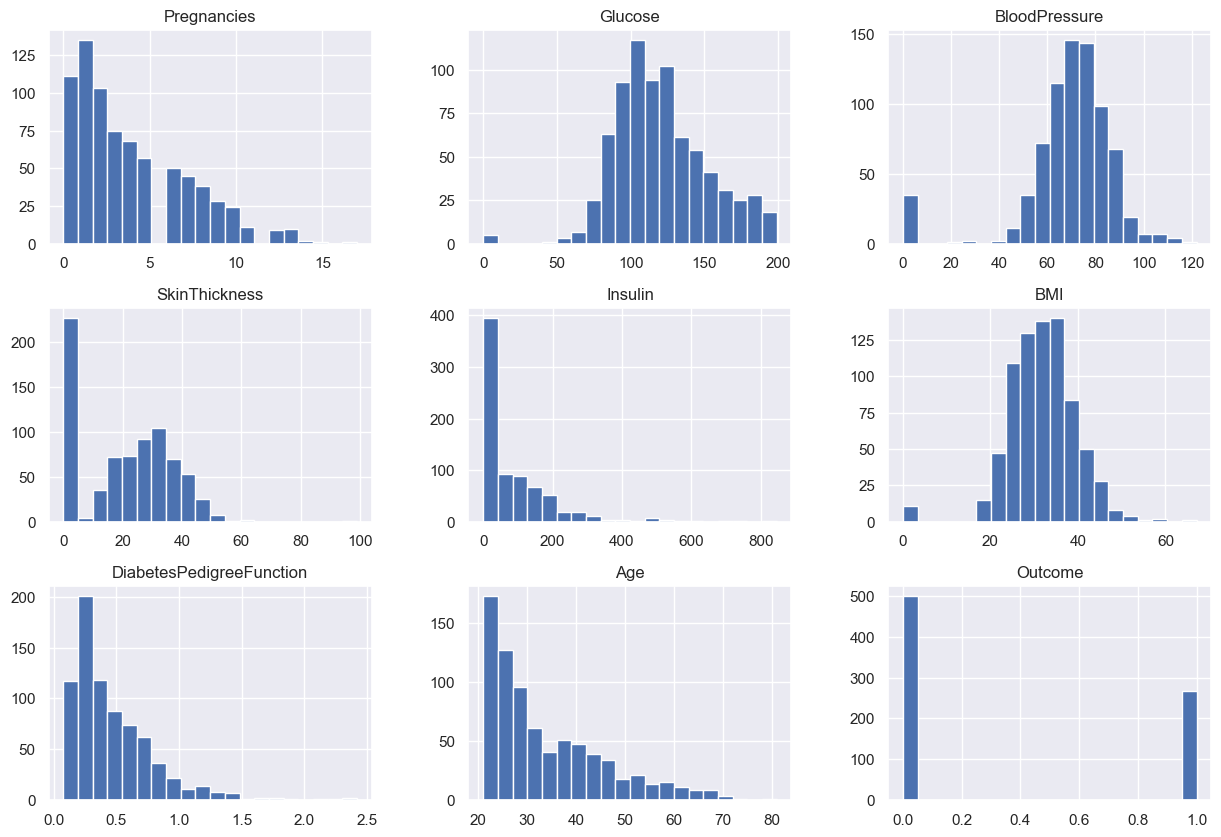

In [82]:
# Visualize the distribution of features
diabetes_data.hist(bins=20, figsize=(15, 10))
plt.show()

#### **Check for Duplicated Values**

In [83]:
# Check for Duplicated Values
print("Duplicated Values is:", diabetes_data.duplicated().sum())

Duplicated Values is: 0


#### **Check the Distribution of Outcome Feature**

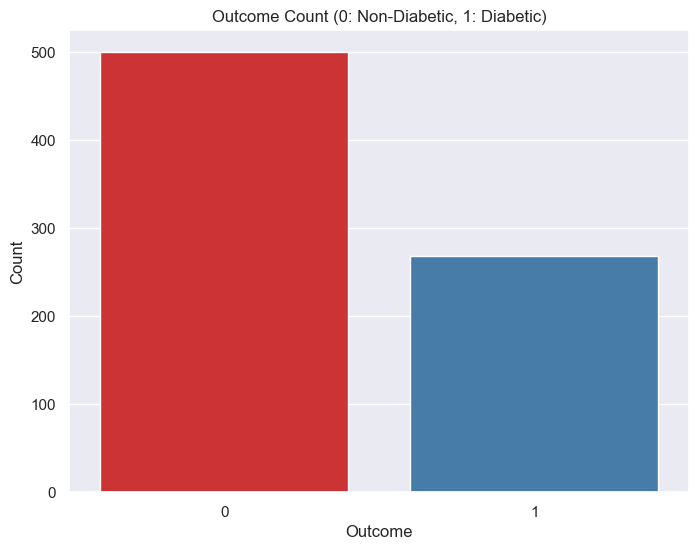

In [84]:
# Plot the count of Outcomes
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetes_data, x='Outcome', palette='Set1')
plt.title('Outcome Count (0: Non-Diabetic, 1: Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


#### **Distribution of Age**

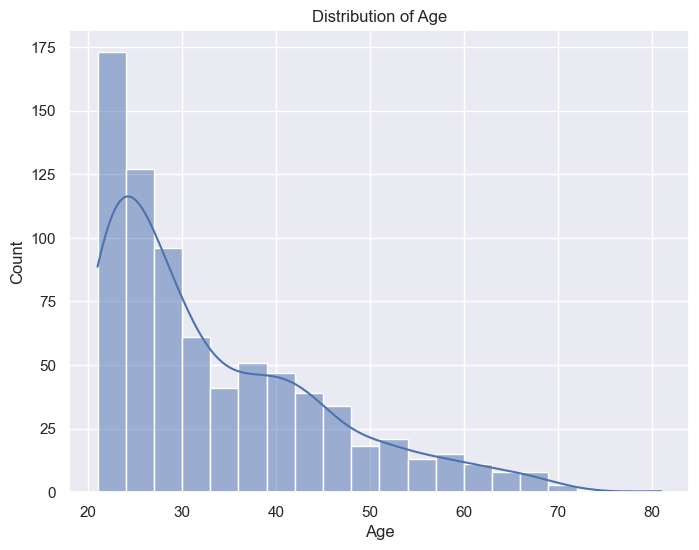

In [85]:
# Age distribution of Counts
plt.figure(figsize=(8, 6))
sns.histplot(data=diabetes_data, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### **Scatter Plot Age and Pregnancies**

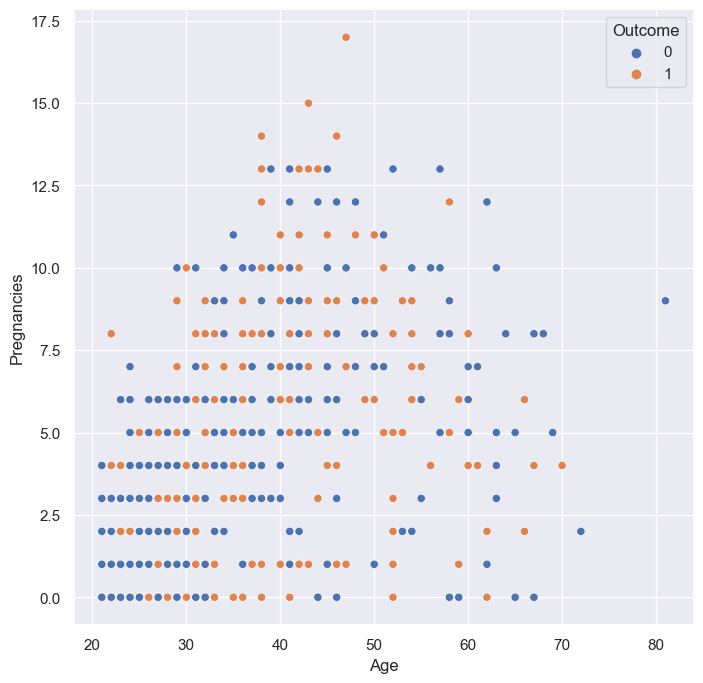

In [86]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Pregnancies", hue="Outcome", 
                data=diabetes_data)
plt.show()

#### **Distribution of Pregnancies**

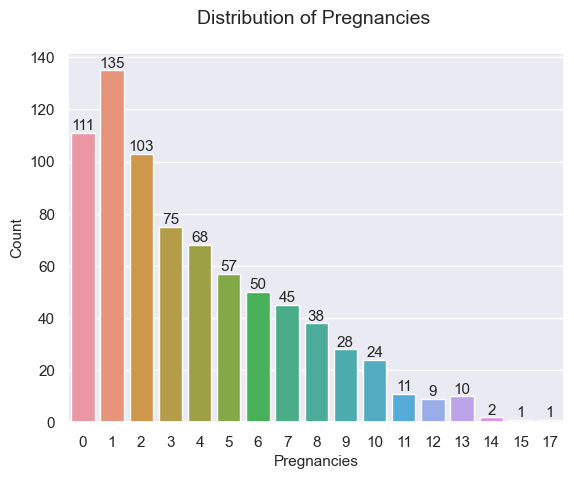

In [87]:
# Distribution of Pregnancies
ax = sns.barplot(x=diabetes_data['Pregnancies'].value_counts().index,
                 y=diabetes_data['Pregnancies'].value_counts())
for bars in ax.containers:
    ax.bar_label(bars,size = 11)
plt.xlabel('Pregnancies', size = 11)
plt.ylabel('Count', size = 11)
plt.title('Distribution of Pregnancies \n', size = 14)
plt.show()


#### **Distribution of Glucose**

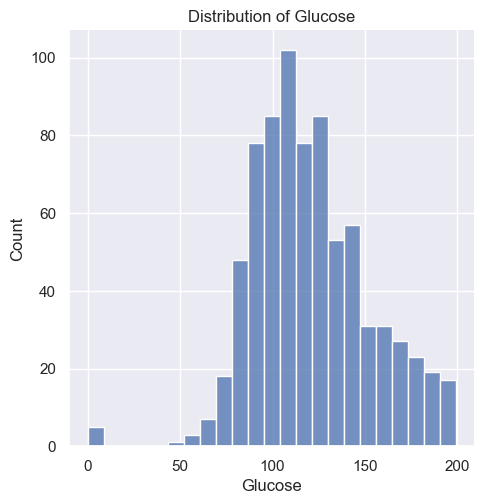

In [88]:
#  Distribution of Glucose
sns.displot(data=diabetes_data, x='Glucose')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

#### **Distribution of BloodPressure**

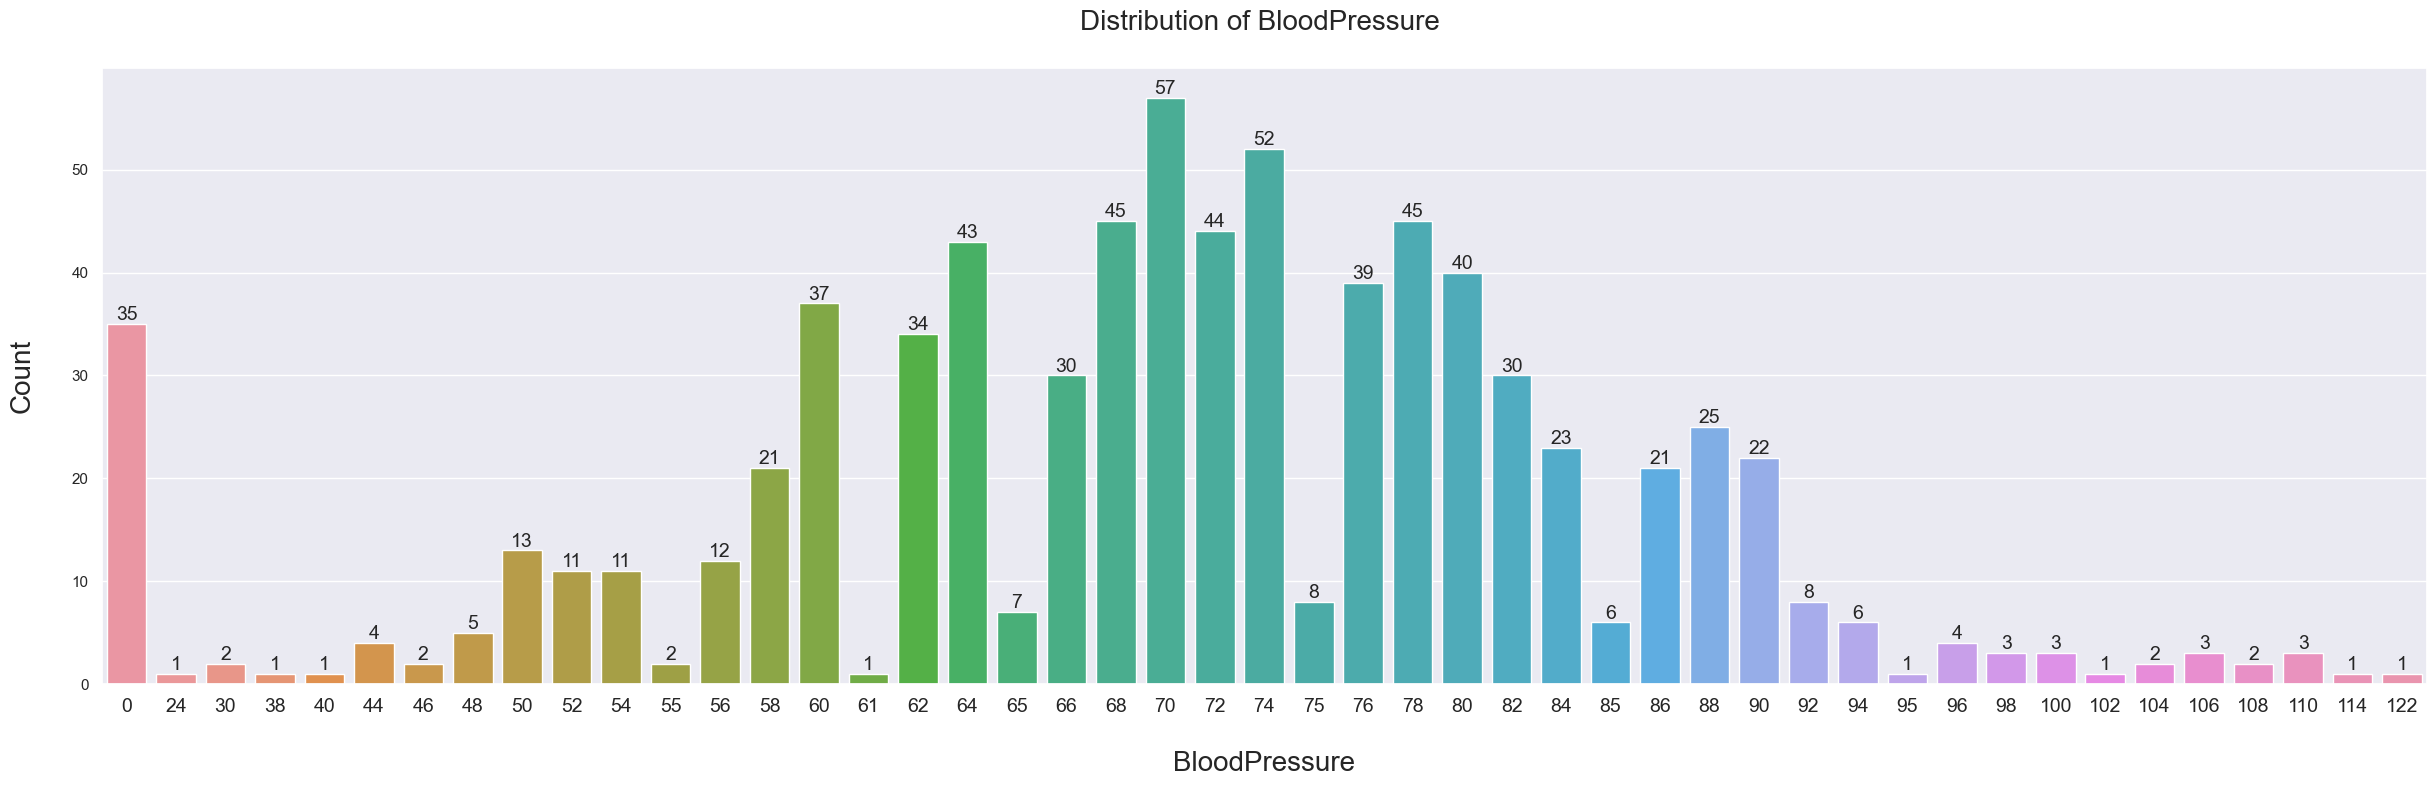

In [89]:
# Distribution of BloodPressure
plt.figure(figsize= (30, 8))
ax = sns.countplot(data =diabetes_data, x=diabetes_data.BloodPressure)
for bars in ax.containers:
    ax.bar_label(bars,size = 14)
plt.title('Distribution of BloodPressure \n', size= 20)
plt.xlabel("\nBloodPressure",size = 20)
plt.ylabel("Count\n",size =20)
plt.xticks(rotation = 0,size= 14)
plt.show()

#### **Distribution of Insulin**

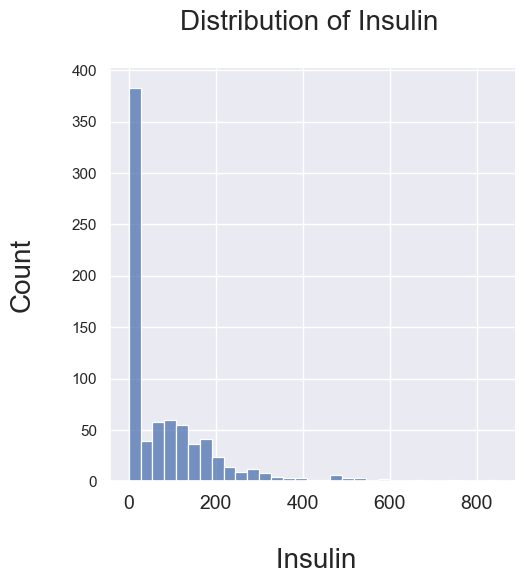

In [90]:
# Distribution of Insulin

sns.displot(data =diabetes_data, x=diabetes_data.Insulin)

plt.title('Distribution of Insulin \n', size= 20)
plt.xlabel("\n Insulin",size = 20)
plt.ylabel("Count\n",size =20)
plt.xticks(rotation = 0,size= 14)
plt.show()

#### **Distribution of BMI**

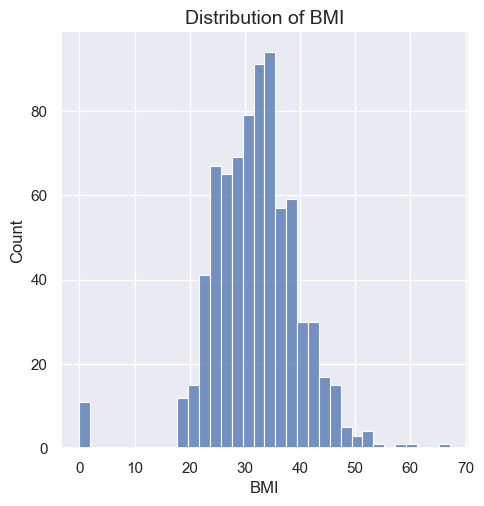

In [91]:
# Distribution of BMI
sns.displot(diabetes_data, x="BMI")
plt.title("Distribution of BMI", size = 14)
plt.show()

#### **Distribution of Diabetes Pedigree Function**

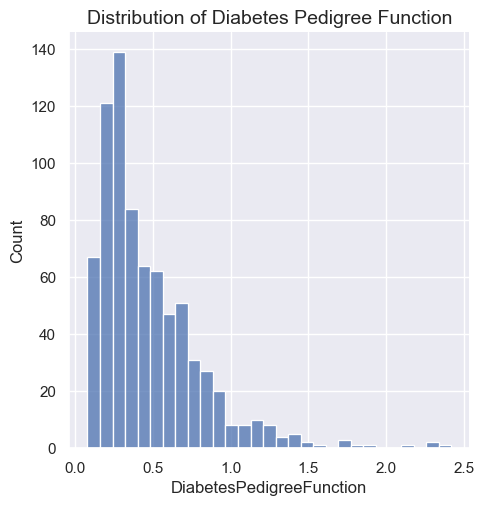

In [92]:
# Distribution of DiabetesPedigreeFunction
sns.displot(diabetes_data, x="DiabetesPedigreeFunction")
plt.title("Distribution of Diabetes Pedigree Function", size = 14)
plt.show()

#### **Checking Outliers in DataFrame**

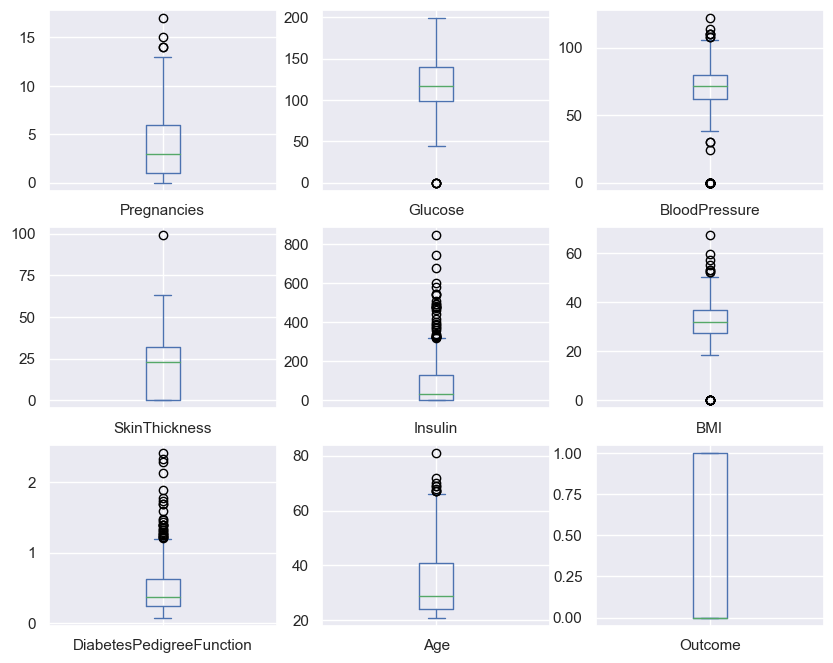

In [93]:
# Checking Outliers in DataFrame
diabetes_data.plot(kind = 'box',subplots = True, layout = (3,3),
                   sharex=False, sharey=False,figsize=(10,8))
plt.show()

#### **Multivariate Analysis**

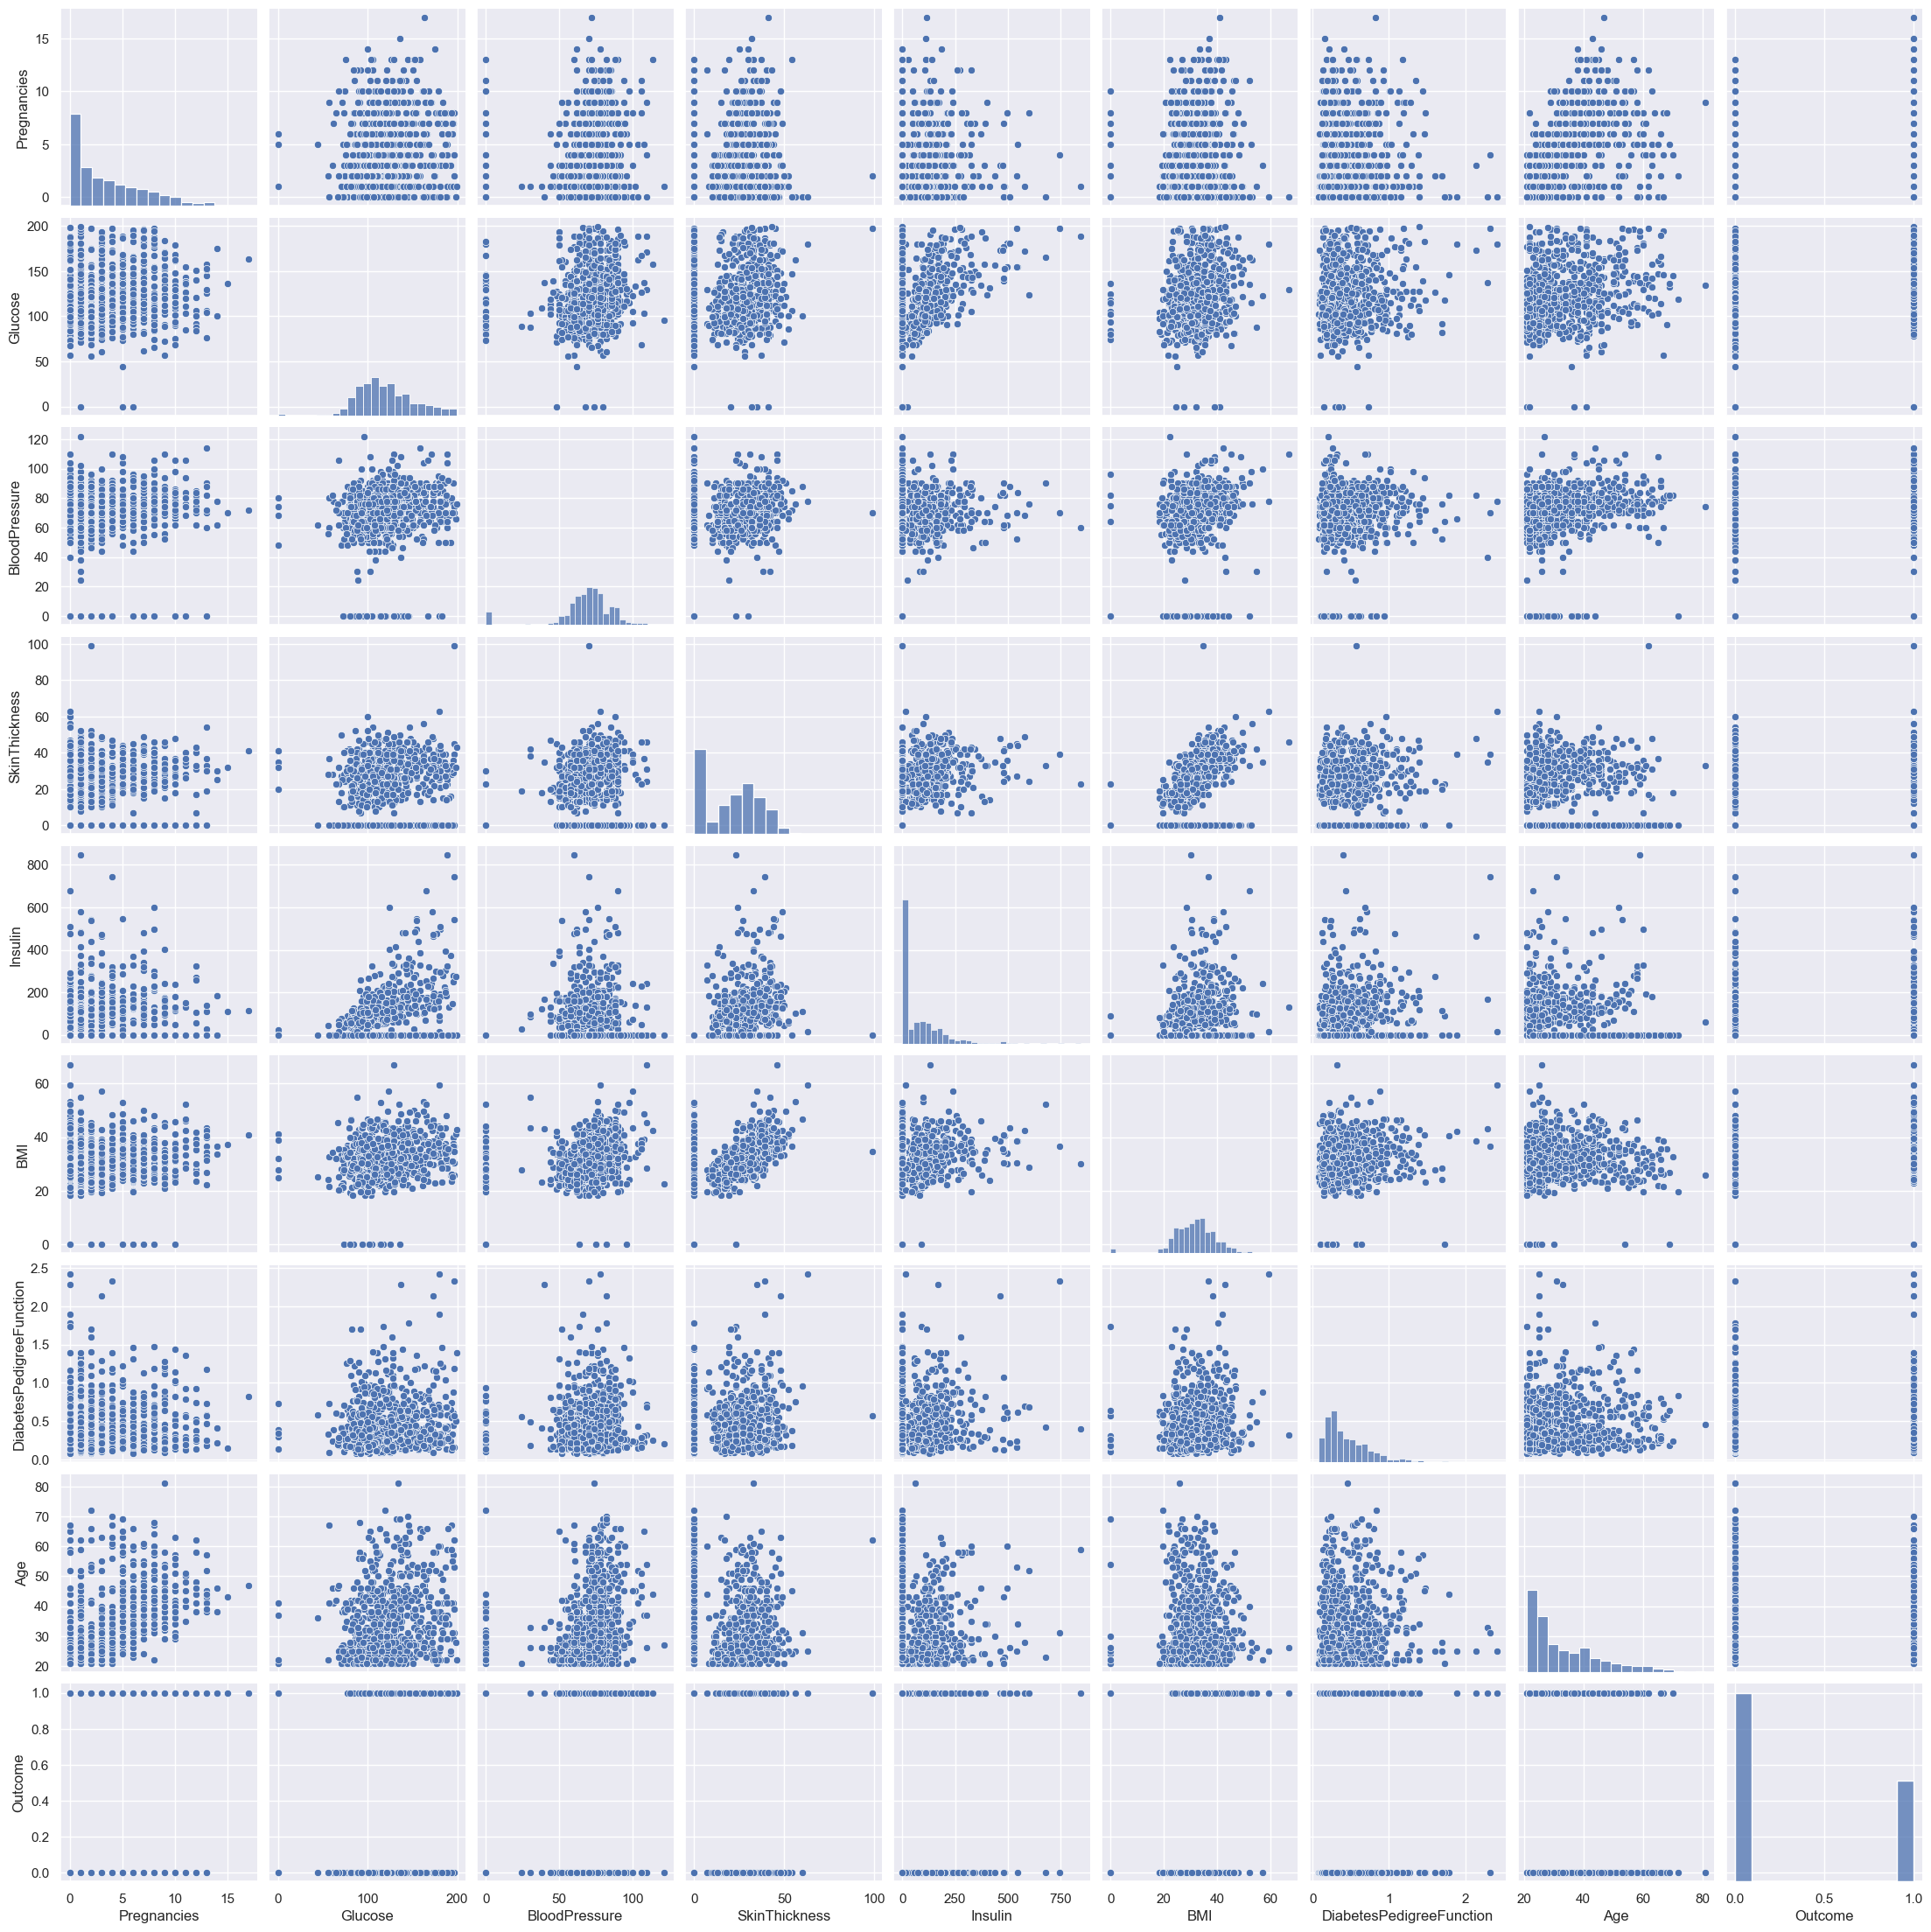

In [94]:
# Multivariate Analysis
sns.pairplot(diabetes_data)
plt.show()

#### **Correlation Matrix Heatmap**

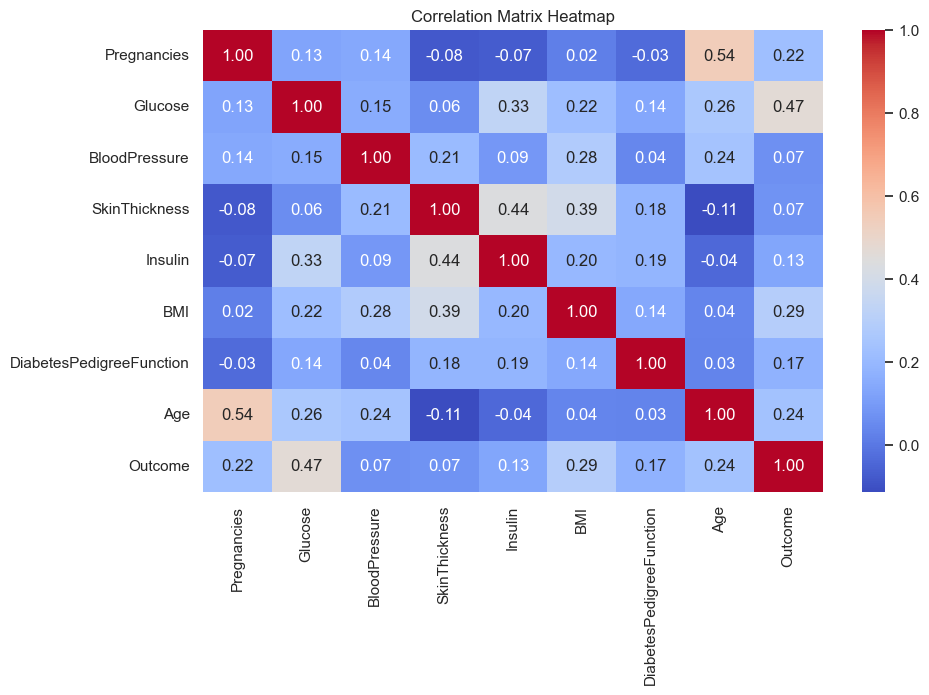

In [95]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### **Data Preprocessing**
#### **Normalize and scale features**

In [96]:
# Normalize and scale features
scaler = StandardScaler()
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
X = scaler.fit_transform(X)

#### **Split the data into training and testing sets**

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42)


In [98]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (614, 8)
Shape of X_test:  (154, 8)
Shape of y_train:  (614,)
Shape of y_test:  (154,)


#### **Train a Random Forest Classifier**

In [99]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### **Make predictions**

In [100]:
# Make predictions
y_pred = model.predict(X_test)

In [101]:
print(y_pred)

[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


#### **Evaluate the model's performance**

In [102]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [103]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[78 21]
 [21 34]]


In [104]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



#### **Function to get user input and predict**

In [109]:
# Function to get user input and predict
def predict_diabetes():
    print("\nEnter Medical Predictor variables:\n")
    predictor_vars = []
    for col in diabetes_data.columns[:-1]:
        value = float(input(f"{col}: "))
        predictor_vars.append(value)
    
    # Create a new input in the same format as the training data
    new_input = pd.DataFrame([predictor_vars], columns=diabetes_data.columns[:-1])
    new_input = scaler.transform(new_input)

    # Predict the outcome
    prediction = model.predict(new_input)
    if prediction[0] == 1:
        print("Prediction of Diabeties Patients: Diabetic")
    else:
        print("Prediction of Diabeties Patients: Non-Diabetic")


#### **Allow the user to make predictions**

In [110]:
# Allow the user to make predictions
while True:
    predict_diabetes()
    again = input("Do you want to predict again? (yes/no): ")
    if again.lower() != "yes":
        break


Enter Medical Predictor variables:

Prediction of Diabeties Patients: Non-Diabetic

Enter Medical Predictor variables:

Prediction of Diabeties Patients: Diabetic
